# <center>**TOÁN ỨNG DỤNG VÀ THỐNG KÊ**</center>
## <center>**Project 4 - Linear Regression**</center>

***
## **1. Thông tin sinh viên**
- Họ và tên: Nguyễn Thái Bảo
- Mã số sinh viên: 23120023
- Lớp: 23CTT1
- Email: 23120023@student.hcmus.edu.vn

***
## **2. Giải thuật OLS**


- Bước 1. Tìm đa thức đặc trưng det(A − λI). Nếu PA(λ) có tổng các lũy thừa khác n thì A không chéo hóa được và thuật toán kết thúc, ngược lại chuyển sang bước 2.

- Bước 2. Tìm tất cả các nghiệm λi của phương trình đa thức đặc trưng. Với mỗi trị riêng λi tìm cơ sở và số chiều cho không gian nghiệm phương trình (A − λIn)X = 0.
 Nếu mỗi λi số chiều không gian nghiệm nhỏ hơn lũy thừa của λi trong đa thức đặc trưng thì A không chéo hóa được và thuật toán kết thúc, ngược lại chuyển sang bước 3.

- Bước 3. Với các vector trong cơ sở không gian nghiệm tìm được ở bước 2, ta đặt ma trận P là ma trận có được bằng cách dựng các vector thành các cột. Khi đó ma trận P làm chéo A và P^(-1)AP là ma trận đường chéo. diag(λ1, ..., λr).



***
## **3. Các hàm tiện ích (Utils)**

In [1]:
def create_matrix(rows, cols, default_value = 0):
    """Tạo ma trận với rows hàng và cols cột"""
    return [[default_value for _ in range(cols)] for _ in range(rows)]

def create_identity_matrix(n):
    """Tạo ma trận đơn vị"""
    identity = create_matrix(n, n)
    for i in range(n):
        identity[i][i] = 1
    return identity

def matrix_copy(A):
    """Tạo bản sao của ma trận A"""
    return [row[:] for row in A]

def matrix_multiply(A, B):
    """Nhân hai ma trận A và B"""

    # Trường hợp B là vector (list đơn giản)
    if not isinstance(B[0], list):
        # Chuyển B thành ma trận cột
        B = [[b] for b in B]
    
    # Lấy kích thước của ma trận
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0]) if isinstance(B[0], list) else 1
    
    # Kiểm tra xem có thể nhân ma trận không
    if cols_A != rows_B:
        raise ValueError(f"Không thể nhân ma trận với kích thước không phù hợp: ({rows_A}x{cols_A}) và ({rows_B}x{cols_B})")
    
    # Khởi tạo ma trận kết quả C kích thước rows_A x cols_B
    C = []
    for i in range(rows_A):
        row = []
        for j in range(cols_B):
            cell_sum = 0
            for k in range(cols_A):
                cell_sum += A[i][k] * B[k][j]
            row.append(cell_sum)
        C.append(row)
    
    # Nếu ma trận kết quả chỉ có 1 cột, trả về vector
    if cols_B == 1:
        return [row[0] for row in C]
    
    return C

def matrix_subtract(A, B):
    """Trừ hai ma trận A và B"""
    m = len(A)
    n = len(A[0])
    C = create_matrix(m, n)
    
    for i in range(m):
        for j in range(n):
            C[i][j] = A[i][j] - B[i][j]
    
    return C

def num_multiply(num, A):
    """Nhân ma trận A với một số"""
    m = len(A)
    n = len(A[0])
    C = create_matrix(m, n)
    
    for i in range(m):
        for j in range(n):
            C[i][j] = num * A[i][j]
    
    return C

def matrix_subtract_lambda_I(A, lambda_val):
    """Tạo ma trận A - lambda*I"""
    n = len(A)
    result = matrix_copy(A)
    
    for i in range(n):
        result[i][i] -= lambda_val
    
    return result

def polynomial_multiply(p1, p2):
    """Nhân hai đa thức"""
    deg1 = len(p1) - 1
    deg2 = len(p2) - 1
    result = [0] * (deg1 + deg2 + 1)
    
    for i in range(len(p1)):
        for j in range(len(p2)):
            result[i + j] += p1[i] * p2[j]
    
    return result

def determinant(A):
    """Tính định thức của ma trận A bằng phương pháp khai triển theo cột"""
    n = len(A)
    
    # Trường hợp cơ bản
    if n == 1:
        return A[0][0]
    if n == 2:
        return A[0][0] * A[1][1] - A[0][1] * A[1][0]
    
    det = 0
    for j in range(n):
        # Tạo ma trận con bằng cách loại bỏ hàng 0 và cột j
        minor = create_matrix(n-1, n-1)
        for i in range(1, n):
            minor_col = 0
            for k in range(n):
                if k != j:
                    minor[i-1][minor_col] = A[i][k]
                    minor_col += 1
        
        cofactor = A[0][j] * ((-1) ** j) * determinant(minor) 
        det += cofactor
    
    return det

def round_matrix(A, decimals = 10):
    """Làm tròn các phần tử của ma trận"""
    result = []
    for row in A:
        result.append([round(x, decimals) for x in row])
    return result

def print_matrix(A):
    """In ma trận A"""
    for row in A:
        print([round(x, 10) for x in row])

def inverse(P):
    """Tính ma trận nghịch đảo của ma trận P bằng phương pháp Gauss - Jordan"""
    n = len(P)
    
    # Tạo ma trận mở rộng [P | I]
    P_augmented = []
    for i in range(n):
        row = P[i][:]
        for j in range(n):
            if i == j:
                row.append(1.0)
            else:
                row.append(0.0)
        P_augmented.append(row)
    
    # Biến đổi Gauss - Jordan
    for i in range(n):
        # Tìm pivot
        max_val = abs(P_augmented[i][i])
        max_row = i
        for k in range(i + 1, n):
            if abs(P_augmented[k][i]) > max_val:
                max_val = abs(P_augmented[k][i])
                max_row = k
        
        # Hoán đổi hàng
        if max_row != i:
            P_augmented[i], P_augmented[max_row] = P_augmented[max_row], P_augmented[i]
        
        # Chuẩn hóa hàng pivot
        pivot = P_augmented[i][i]
        for j in range(i, 2*n):
            P_augmented[i][j] /= pivot
        
        # Khử tất cả các hàng khác
        for k in range(n):
            if k != i:
                factor = P_augmented[k][i]
                for j in range(i, 2*n):
                    P_augmented[k][j] -= factor * P_augmented[i][j]
    
    # Lấy ma trận nghịch đảo
    P_inverse = []
    for i in range(n):
        P_inverse.append(P_augmented[i][n:])
    
    return P_inverse

# Hàm để tính chuyển vị của ma trận
def transpose(A):
    """
    Tính ma trận chuyển vị của ma trận A.
    
    Parameters:
    A (list of lists): Ma trận đầu vào
    
    Returns:
    list of lists: Ma trận chuyển vị
    """
    # Kiểm tra nếu A là vector
    if not isinstance(A[0], list):
        return [[a] for a in A]  # Chuyển vector hàng thành vector cột
    
    # Tính ma trận chuyển vị
    rows = len(A)
    cols = len(A[0])
    A_T = [[0 for _ in range(rows)] for _ in range(cols)]
    
    for i in range(rows):
        for j in range(cols):
            A_T[j][i] = A[i][j]
    
    return A_T

---
## **4. Xây dựng mô hình đánh giá chất lượng rượu**
***Sử dụng phương pháp hồi quy tuyến tính***

In [2]:
import pandas as pd
df = pd.read_csv('wine.csv')

In [3]:
df

,"""quality""","""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol"""
0,5,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
1,5,7.8,0.880,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8
2,5,7.8,0.760,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8
3,6,11.2,0.280,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,6,7.0,0.745,0.12,1.8,0.114,15.0,64,0.99588,3.22,0.59,9.5
1195,6,6.2,0.430,0.22,1.8,0.078,21.0,56,0.99633,3.52,0.60,9.5
1196,6,7.9,0.580,0.23,2.3,0.076,23.0,94,0.99686,3.21,0.58,9.5
1197,6,7.7,0.570,0.21,1.5,0.069,4.0,9,0.99458,3.16,0.54,9.8


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Tên các cột trong DataFrame
df_columns = df.columns.tolist()
print("Tên các cột trong DataFrame:")
print(df_columns)

quality_col = df_columns[0]  # Cột đầu tiên là chất lượng
print(f"\nSử dụng cột '{quality_col}' làm biến mục tiêu.")

# Danh sách 11 đặc trưng (các cột còn lại)
print("\nCác đặc trưng được sử dụng trong mô hình:")
features = df_columns[1:]  # Bỏ qua cột đầu tiên (chất lượng)
print(features)
print(f"Số lượng đặc trưng: {len(features)}")

# Tách dữ liệu thành features (X) và target (y)
X = df[features].values
y = df[quality_col].values

# Hiển thị thông tin cơ bản
print(f"\nSố lượng mẫu: {X.shape[0]}")
print(f"Số lượng đặc trưng: {X.shape[1]}")

# Thêm cột hằng số 1 để tính hệ số chặn (intercept)
X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))

# Hàm triển khai OLS từ đầu
def ols_implementation(X, y):
    """
    Triển khai thuật toán Ordinary Least Squares từ đầu.
    
    Công thức: β = (X^T X)^(-1) X^T y
    
    Parameters:
    X (numpy.ndarray): Ma trận các đặc trưng (có thêm cột 1 cho hệ số chặn)
    y (numpy.ndarray): Vector giá trị mục tiêu
    
    Returns:
    numpy.ndarray: Vector hệ số β
    """
    # Tính ma trận (X^T X)
    X_transpose_X = np.dot(X.T, X)
    
    # Tính nghịch đảo của ma trận (X^T X)
    X_transpose_X_inverse = np.linalg.inv(X_transpose_X)
    
    # Tính ma trận (X^T y)
    X_transpose_y = np.dot(X.T, y)
    
    # Tính hệ số β = (X^T X)^(-1) X^T y
    beta = np.dot(X_transpose_X_inverse, X_transpose_y)
    
    return beta

# Tính các hệ số của mô hình
print(X_with_intercept)
print(y)
coefficients = ols_implementation(X_with_intercept, y)

# Hàm dự đoán sử dụng mô hình OLS
def predict(X, coefficients):
    """
    Dự đoán sử dụng mô hình OLS.
    
    Parameters:
    X (numpy.ndarray): Ma trận các đặc trưng (không có cột 1 cho hệ số chặn)
    coefficients (numpy.ndarray): Vector hệ số β
    
    Returns:
    numpy.ndarray: Vector giá trị dự đoán
    """
    # Thêm cột hằng số 1 để tính hệ số chặn
    X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))
    
    # Tính giá trị dự đoán y_hat = Xβ
    y_pred = np.dot(X_with_intercept, coefficients)
    
    return y_pred

# Hàm tính các chỉ số đánh giá mô hình
def evaluate_model(y_true, y_pred):
    """
    Tính các chỉ số đánh giá mô hình.
    
    Parameters:
    y_true (numpy.ndarray): Giá trị thực tế
    y_pred (numpy.ndarray): Giá trị dự đoán
    
    Returns:
    tuple: (MSE, R²)
    """
    # Tính Mean Squared Error (MSE)
    mse = np.mean((y_true - y_pred) ** 2)
    
    # Tính Total Sum of Squares (TSS)
    y_mean = np.mean(y_true)
    tss = np.sum((y_true - y_mean) ** 2)
    
    # Tính Residual Sum of Squares (RSS)
    rss = np.sum((y_true - y_pred) ** 2)
    
    # Tính hệ số xác định R²
    r_squared = 1 - (rss / tss)
    
    return mse, r_squared

# Tính giá trị dự đoán
y_pred = predict(X, coefficients)

# Đánh giá mô hình
mse, r_squared = evaluate_model(y, y_pred)

# In kết quả
print("\nHệ số của mô hình OLS:")
print(f"Hệ số chặn (Intercept): {coefficients[0]:.6f}")
for i, name in enumerate(features):
    # Loại bỏ dấu ngoặc kép để in ra dễ đọc hơn
    clean_name = name.strip('"')
    print(f"{clean_name}: {coefficients[i+1]:.6f}")

print("\nĐánh giá mô hình:")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Hệ số xác định (R²): {r_squared:.6f}")

# Phương trình hồi quy
print("\nPhương trình hồi quy tuyến tính:")
equation = f"quality = {coefficients[0]:.6f}"
for i, name in enumerate(features):
    coefficient = coefficients[i+1]
    sign = "+" if coefficient >= 0 else ""
    # Loại bỏ dấu ngoặc kép để in ra dễ đọc hơn
    clean_name = name.strip('"')
    equation += f" {sign} {coefficient:.6f}*{clean_name}"
print(equation)

# Vẽ biểu đồ so sánh giá trị thực tế và dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.xlabel('Giá trị thực tế của chất lượng rượu')
plt.ylabel('Giá trị dự đoán')
plt.title('Giá trị thực tế vs. Dự đoán cho chất lượng rượu')
plt.tight_layout()
plt.grid(True)
plt.show()

# Vẽ biểu đồ các phần dư
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Phần dư')
plt.title('Biểu đồ phần dư')
plt.tight_layout()
plt.grid(True)
plt.show()

# Vẽ biểu đồ hệ số để thấy tầm quan trọng của các đặc trưng
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'Feature': [name.strip('"') for name in features],  # Loại bỏ dấu ngoặc kép
    'Coefficient': coefficients[1:]
})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

plt.bar(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Đặc trưng')
plt.ylabel('Hệ số')
plt.title('Hệ số của các đặc trưng trong mô hình OLS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Chuyển về vector

Tên các cột trong DataFrame:
['"quality"', '"fixed acidity"', '"volatile acidity"', '"citric acid"', '"residual sugar"', '"chlorides"', '"free sulfur dioxide"', '"total sulfur dioxide"', '"density"', '"pH"', '"sulphates"', '"alcohol"']

Sử dụng cột '"quality"' làm biến mục tiêu.

Số lượng mẫu: 1199
Số lượng đặc trưng: 11

Hệ số của mô hình OLS:
Hệ số chặn (Intercept): 42.917162
fixed acidity: 0.047525
volatile acidity: -1.068743
citric acid: -0.268711
residual sugar: 0.034974
chlorides: -1.597296
free sulfur dioxide: 0.003488
total sulfur dioxide: -0.003798
density: -39.469081
pH: -0.245576
sulphates: 0.773841
alcohol: 0.269377

Đánh giá mô hình:
Mean Squared Error (MSE): 0.407153
Hệ số xác định (R²): 0.378291

Phương trình hồi quy tuyến tính:
quality = 42.917162 + 0.047525*fixed acidity  -1.068743*volatile acidity  -0.268711*citric acid + 0.034974*residual sugar  -1.597296*chlorides + 0.003488*free sulfur dioxide  -0.003798*total sulfur dioxide  -39.469081*density  -0.245576*pH + 0.77

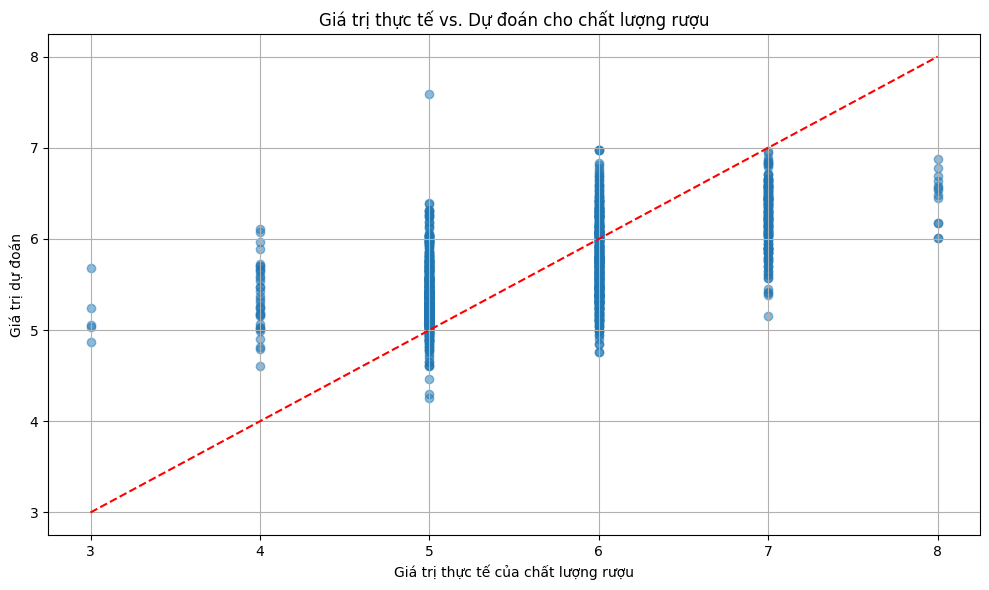

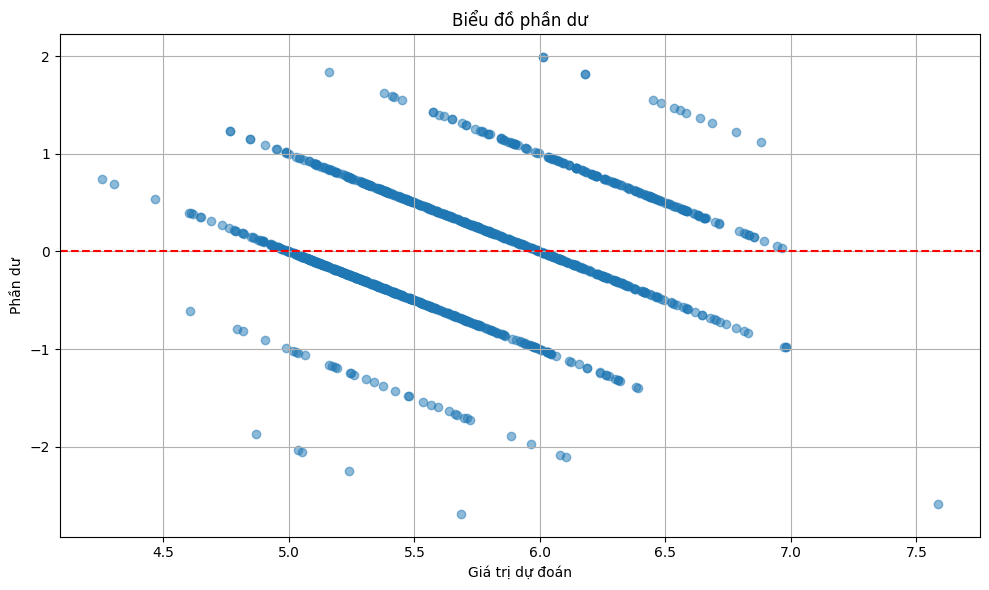

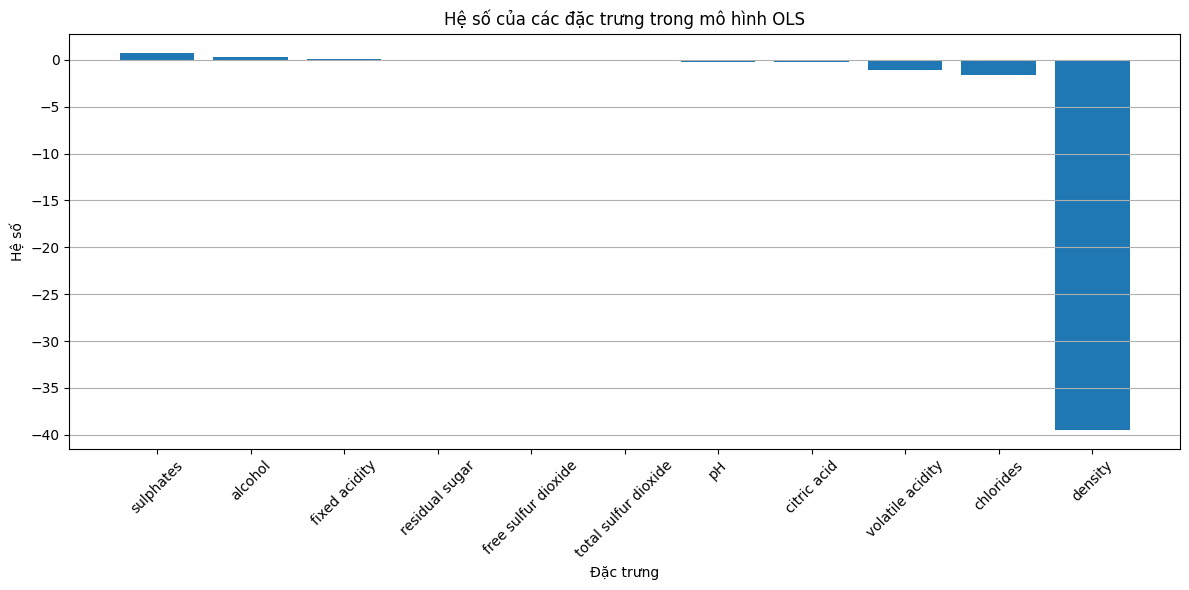

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Tên các cột trong DataFrame
df_columns = df.columns.tolist()
print("Tên các cột trong DataFrame:")
print(df_columns)

# Từ đầu ra, chúng ta biết rằng cột chất lượng là '"quality"' (có dấu ngoặc kép)
quality_col = df_columns[0]  # Cột đầu tiên là chất lượng
print(f"\nSử dụng cột '{quality_col}' làm biến mục tiêu.")


# Tách dữ liệu thành features (X) và target (y)
X = df[features].values.tolist()
y = df[quality_col].values.tolist()


# Hiển thị thông tin cơ bản
print(f"\nSố lượng mẫu: {len(X)}")
print(f"Số lượng đặc trưng: {len(X[0])}")

# Thêm cột hằng số 1 để tính hệ số chặn (intercept)
X_with_intercept = [[1] + row for row in X]

# Hàm triển khai OLS từ đầu
def ols(X, y):
    """
    Triển khai thuật toán Ordinary Least Squares từ đầu.
    
    Công thức: β = (X^T X)^(-1) X^T y
    
    Parameters:
    X (numpy.ndarray): Ma trận các đặc trưng (có thêm cột 1 cho hệ số chặn)
    y (numpy.ndarray): Vector giá trị mục tiêu
    
    Returns:
    numpy.ndarray: Vector hệ số β
    """
     # Tính ma trận X_transpose
    X_transpose = transpose(X)
    
    # Tính ma trận (X^T X)
    X_transpose_X = matrix_multiply(X_transpose, X)
    
    # Tính nghịch đảo của ma trận (X^T X)
    X_transpose_X_inverse = inverse(X_transpose_X)
    
    # Tính ma trận (X^T y)
    X_transpose_y = matrix_multiply(transpose(X), y)
    
    # Tính hệ số β = (X^T X)^(-1) X^T y
    beta = matrix_multiply(X_transpose_X_inverse, X_transpose_y)
    
    return beta

# Tính các hệ số của mô hình
coefficients = ols(X_with_intercept, y)

# Hàm dự đoán sử dụng mô hình OLS
def predict(X, coefficients):
    """
    Dự đoán sử dụng mô hình OLS.
    
    Parameters:
    X (list of lists): Ma trận các đặc trưng (không có cột 1 cho hệ số chặn)
    coefficients (list): Vector hệ số β
    
    Returns:
    list: Vector giá trị dự đoán
    """
    # Thêm cột hằng số 1 để tính hệ số chặn
    X_with_intercept = []
    for row in X:
        X_with_intercept.append([1] + row)
    
    # Tính giá trị dự đoán y_hat = Xβ
    y_pred = []
    for row in X_with_intercept:
        pred = 0
        for j in range(len(coefficients)):
            pred += row[j] * coefficients[j]
        y_pred.append(pred)
    
    return y_pred

# Hàm tính các chỉ số đánh giá mô hình
def evaluate_model(y_true, y_pred):
    """
    Tính các chỉ số đánh giá mô hình.
    
    Parameters:
    y_true (list): Giá trị thực tế
    y_pred (list): Giá trị dự đoán
    
    Returns:
    tuple: (MSE, R²)
    """
    # Tính Mean Squared Error (MSE)
    squared_errors = [(y_true[i] - y_pred[i]) ** 2 for i in range(len(y_true))]
    mse = sum(squared_errors) / len(y_true)
    
    # Tính giá trị trung bình của y_true
    y_mean = sum(y_true) / len(y_true)
    
    # Tính Total Sum of Squares (TSS)
    tss = sum([(y - y_mean) ** 2 for y in y_true])
    
    # Tính Residual Sum of Squares (RSS)
    rss = sum(squared_errors)
    
    # Tính hệ số xác định R²
    r_squared = 1 - (rss / tss)
    
    return mse, r_squared

# Tính giá trị dự đoán
y_pred = predict(X, coefficients)

# Đánh giá mô hình
mse, r_squared = evaluate_model(y, y_pred)

# In kết quả
print("\nHệ số của mô hình OLS:")
print(f"Hệ số chặn (Intercept): {coefficients[0]:.6f}")
for i, name in enumerate(features):
    # Loại bỏ dấu ngoặc kép để in ra dễ đọc hơn
    clean_name = name.strip('"')
    print(f"{clean_name}: {coefficients[i+1]:.6f}")

print("\nĐánh giá mô hình:")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Hệ số xác định (R²): {r_squared:.6f}")

# Phương trình hồi quy
print("\nPhương trình hồi quy tuyến tính:")
equation = f"quality = {coefficients[0]:.6f}"
for i, name in enumerate(features):
    coefficient = coefficients[i+1]
    sign = "+" if coefficient >= 0 else ""
    # Loại bỏ dấu ngoặc kép để in ra dễ đọc hơn
    clean_name = name.strip('"')
    equation += f" {sign} {coefficient:.6f}*{clean_name}"
print(equation)

# Vẽ biểu đồ so sánh giá trị thực tế và dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.xlabel('Giá trị thực tế của chất lượng rượu')
plt.ylabel('Giá trị dự đoán')
plt.title('Giá trị thực tế vs. Dự đoán cho chất lượng rượu')
plt.tight_layout()
plt.grid(True)
plt.show()

# Vẽ biểu đồ các phần dư
residuals = [y[i] - y_pred[i] for i in range(len(y))]
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Phần dư')
plt.title('Biểu đồ phần dư')
plt.tight_layout()
plt.grid(True)
plt.show()

# Vẽ biểu đồ hệ số để thấy tầm quan trọng của các đặc trưng
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'Feature': [name.strip('"') for name in features],  # Loại bỏ dấu ngoặc kép
    'Coefficient': coefficients[1:]
})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

plt.bar(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Đặc trưng')
plt.ylabel('Hệ số')
plt.title('Hệ số của các đặc trưng trong mô hình OLS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

**CROSS VALIDATION**

Bắt đầu phân tích từng đặc trưng...

Đặc trưng: fixed acidity
  MSE trung bình: 0.641550
  R² trung bình: 0.017791
Đặc trưng: volatile acidity
  MSE trung bình: 0.561257
  R² trung bình: 0.141175
Đặc trưng: citric acid
  MSE trung bình: 0.622039
  R² trung bình: 0.046314
Đặc trưng: residual sugar
  MSE trung bình: 0.655195
  R² trung bình: -0.003937
Đặc trưng: chlorides
  MSE trung bình: 0.646549
  R² trung bình: 0.009099
Đặc trưng: free sulfur dioxide
  MSE trung bình: 0.654491
  R² trung bình: -0.003808
Đặc trưng: total sulfur dioxide
  MSE trung bình: 0.623774
  R² trung bình: 0.042596
Đặc trưng: density
  MSE trung bình: 0.632348
  R² trung bình: 0.030288
Đặc trưng: pH
  MSE trung bình: 0.652964
  R² trung bình: -0.000754
Đặc trưng: sulphates
  MSE trung bình: 0.629172
  R² trung bình: 0.034973
Đặc trưng: alcohol
  MSE trung bình: 0.488566
  R² trung bình: 0.252509

Xếp hạng theo R²:
                 Feature       MSE        R²
10               alcohol  0.488566  0.252509
1       v

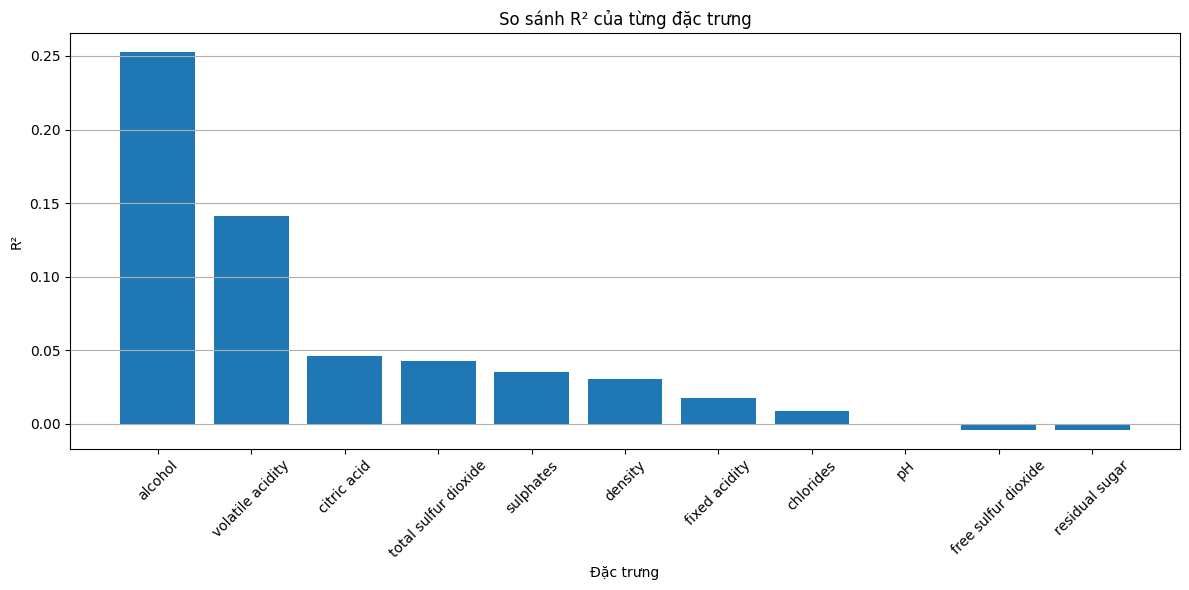

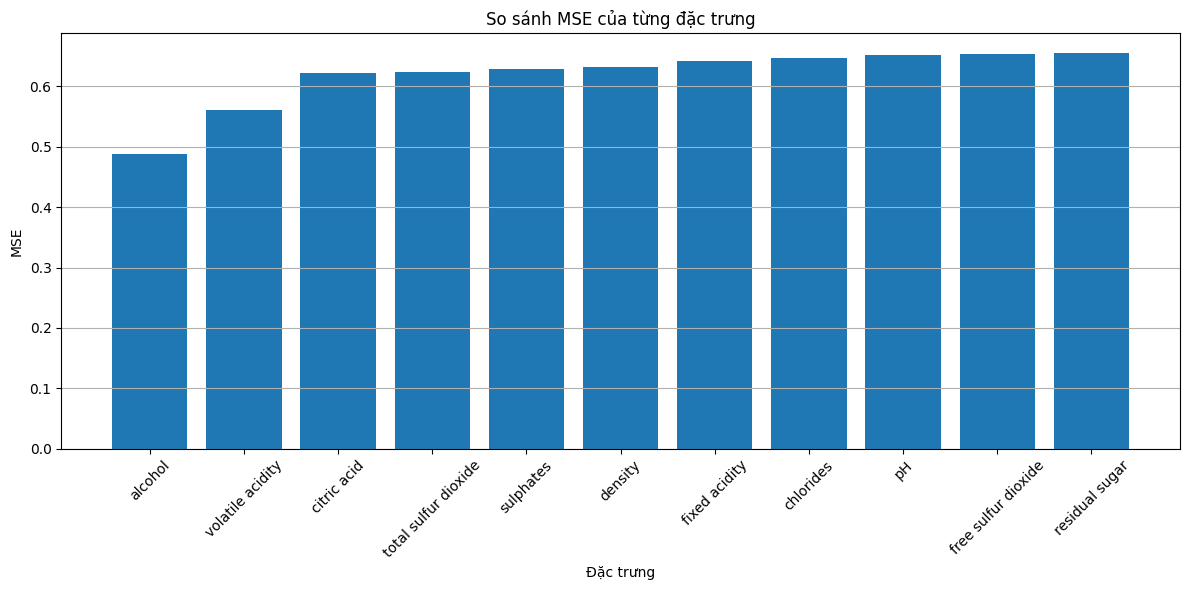


Mô hình cho đặc trưng tốt nhất (alcohol):
  Hệ số chặn (β₀): 1.774076
  Hệ số góc (β₁): 0.374710
  MSE: 0.487635
  R²: 0.255398
  Phương trình hồi quy: quality = 1.774076 + 0.374710 × alcohol


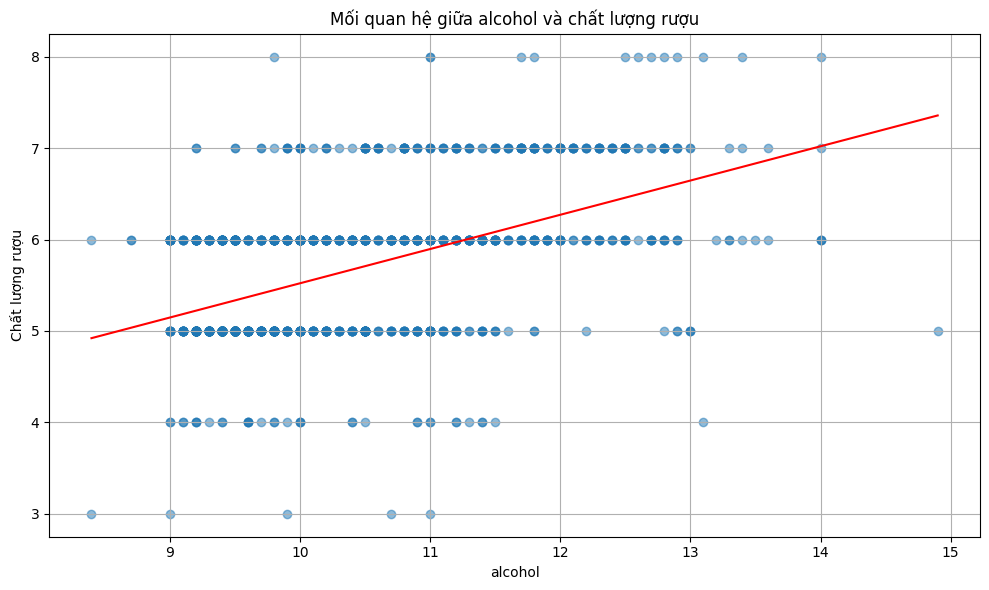

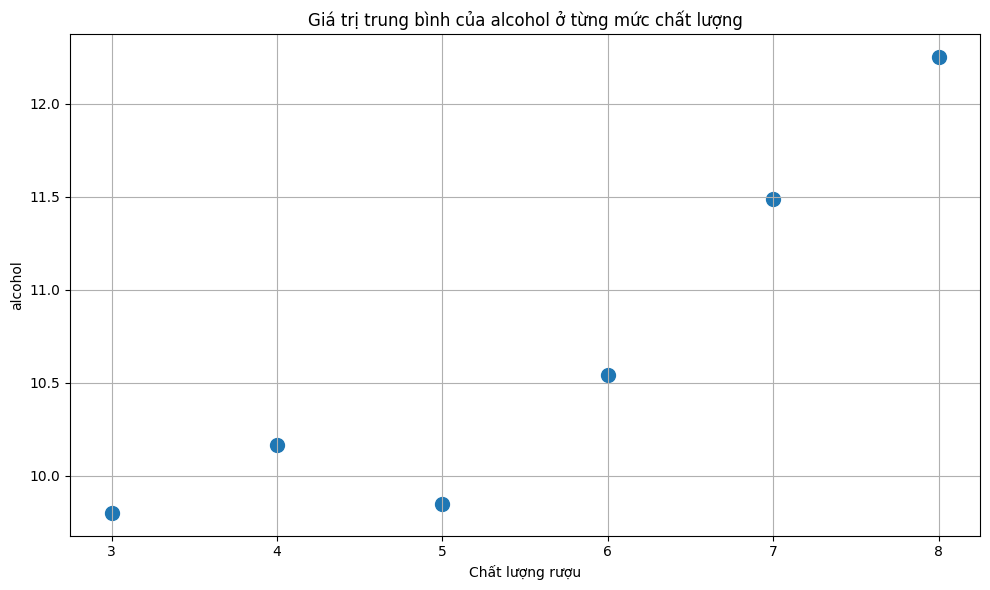

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

# Tên các cột trong DataFrame
feature_columns = df.columns[1:].tolist()  # Bỏ qua cột đầu tiên (chất lượng)
quality_col = df.columns[0]  # Cột đầu tiên là chất lượng

# Danh sách để lưu MSE và R² cho từng đặc trưng
all_mse = []  
all_r2 = []
feature_names = []

# Hàm tự triển khai k-fold cross validation
def custom_kfold(n_samples, n_folds=5, random_seed=42):
    """
    Tự triển khai k-fold cross validation.
    
    Parameters:
    n_samples (int): Số lượng mẫu
    n_folds (int): Số lượng fold
    random_seed (int): Giá trị seed để tái tạo kết quả
    
    Returns:
    list: Danh sách các cặp chỉ số (train_indices, test_indices)
    """
    # Đặt seed cho khả năng tái tạo
    random.seed(random_seed)
    np.random.seed(random_seed)
    
    # Tạo chỉ số cho tất cả các mẫu
    indices = np.arange(n_samples)
    
    # Xáo trộn chỉ số
    np.random.shuffle(indices)
    
    # Chia thành k phần gần bằng nhau
    fold_sizes = np.full(n_folds, n_samples // n_folds, dtype=int)
    fold_sizes[:n_samples % n_folds] += 1  # Phân phối phần dư
    
    # Tạo chỉ số cho từng fold
    current = 0
    folds = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        test_indices = indices[start:stop]
        train_indices = np.concatenate([indices[:start], indices[stop:]])
        folds.append((train_indices, test_indices))
        current = stop
        
    return folds

# Hàm triển khai OLS từ đầu (đơn giản hóa cho một đặc trưng)
def ols_single_feature(X, y):
    """
    Triển khai thuật toán OLS cho một đặc trưng.
    
    Công thức đơn giản hóa:
    β₁ = Σ(x_i - x̄)(y_i - ȳ) / Σ(x_i - x̄)²
    β₀ = ȳ - β₁x̄
    
    Parameters:
    X (numpy.ndarray): Vector đặc trưng (1D)
    y (numpy.ndarray): Vector giá trị mục tiêu
    
    Returns:
    tuple: (β₀, β₁) - hệ số chặn và hệ số góc
    """
    # Tính giá trị trung bình
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    
    # Tính hệ số góc β₁
    numerator = np.sum((X - x_mean) * (y - y_mean))
    denominator = np.sum((X - x_mean) ** 2)
    
    # Kiểm tra chia cho 0
    if denominator == 0:
        beta_1 = 0
    else:
        beta_1 = numerator / denominator
    
    # Tính hệ số chặn β₀
    beta_0 = y_mean - beta_1 * x_mean
    
    return beta_0, beta_1

# Hàm dự đoán
def predict(X, beta_0, beta_1):
    """
    Dự đoán dựa trên mô hình hồi quy tuyến tính đơn giản.
    
    Parameters:
    X (numpy.ndarray): Vector đặc trưng (1D)
    beta_0 (float): Hệ số chặn
    beta_1 (float): Hệ số góc
    
    Returns:
    numpy.ndarray: Vector giá trị dự đoán
    """
    return beta_0 + beta_1 * X

# Hàm tính MSE và R²
def evaluate_model(y_true, y_pred):
    """
    Tính các chỉ số đánh giá mô hình.
    
    Parameters:
    y_true (numpy.ndarray): Giá trị thực tế
    y_pred (numpy.ndarray): Giá trị dự đoán
    
    Returns:
    tuple: (MSE, R²)
    """
    # Tính Mean Squared Error (MSE)
    mse = np.mean((y_true - y_pred) ** 2)
    
    # Tính Total Sum of Squares (TSS)
    y_mean = np.mean(y_true)
    tss = np.sum((y_true - y_mean) ** 2)
    
    # Tính Residual Sum of Squares (RSS)
    rss = np.sum((y_true - y_pred) ** 2)
    
    # Tính hệ số xác định R²
    if tss == 0:
        r_squared = 0
    else:
        r_squared = 1 - (rss / tss)
    
    return mse, r_squared

# Số fold cho cross validation
k = 5
n_samples = len(df)

# Tạo folds cho cross validation
folds = custom_kfold(n_samples, n_folds=k, random_seed=42)

# Đánh giá từng đặc trưng sử dụng cross validation
print("Bắt đầu phân tích từng đặc trưng...\n")

for feature_col in feature_columns:
    X = df[feature_col].values
    y = df[quality_col].values
    
    # Loại bỏ dấu ngoặc kép cho tên đặc trưng
    feature_name = feature_col.strip('"')
    feature_names.append(feature_name)
    
    # Khởi tạo danh sách để lưu kết quả của các fold
    fold_mse = []
    fold_r2 = []
    
    # Thực hiện k-fold cross validation
    for i, (train_idx, test_idx) in enumerate(folds):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Tính hệ số hồi quy
        beta_0, beta_1 = ols_single_feature(X_train, y_train)
        
        # Dự đoán
        y_pred = predict(X_test, beta_0, beta_1)
        
        # Đánh giá
        mse, r2 = evaluate_model(y_test, y_pred)
        
        fold_mse.append(mse)
        fold_r2.append(r2)
    
    # Tính trung bình các chỉ số đánh giá qua các fold
    avg_mse = np.mean(fold_mse)
    avg_r2 = np.mean(fold_r2)
    
    all_mse.append(avg_mse)
    all_r2.append(avg_r2)
    
    print(f"Đặc trưng: {feature_name}")
    print(f"  MSE trung bình: {avg_mse:.6f}")
    print(f"  R² trung bình: {avg_r2:.6f}")

# Tạo bảng kết quả
results = pd.DataFrame({
    'Feature': feature_names,
    'MSE': all_mse,
    'R²': all_r2
})

# Sắp xếp theo R² giảm dần (hoặc MSE tăng dần)
results_by_r2 = results.sort_values('R²', ascending=False)
results_by_mse = results.sort_values('MSE')

print("\nXếp hạng theo R²:")
print(results_by_r2)

print("\nXếp hạng theo MSE:")
print(results_by_mse)

# Tìm đặc trưng tốt nhất
best_feature_r2_idx = np.argmax(all_r2)
best_feature_r2 = feature_names[best_feature_r2_idx]

best_feature_mse_idx = np.argmin(all_mse)
best_feature_mse = feature_names[best_feature_mse_idx]

print(f"\nĐặc trưng tốt nhất theo R²: {best_feature_r2}")
print(f"Đặc trưng tốt nhất theo MSE: {best_feature_mse}")

# Vẽ biểu đồ so sánh R² của các đặc trưng
plt.figure(figsize=(12, 6))
plt.bar(results_by_r2['Feature'], results_by_r2['R²'])
plt.xlabel('Đặc trưng')
plt.ylabel('R²')
plt.title('So sánh R² của từng đặc trưng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Vẽ biểu đồ so sánh MSE của các đặc trưng
plt.figure(figsize=(12, 6))
plt.bar(results_by_mse['Feature'], results_by_mse['MSE'])
plt.xlabel('Đặc trưng')
plt.ylabel('MSE')
plt.title('So sánh MSE của từng đặc trưng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Phân tích chi tiết đặc trưng tốt nhất
best_feature_col = f'"{best_feature_r2}"'  # Thêm dấu ngoặc kép
X_best = df[best_feature_col].values
y = df[quality_col].values

# Tính hệ số cho toàn bộ dữ liệu
beta_0, beta_1 = ols_single_feature(X_best, y)
y_pred = predict(X_best, beta_0, beta_1)
mse, r2 = evaluate_model(y, y_pred)

print(f"\nMô hình cho đặc trưng tốt nhất ({best_feature_r2}):")
print(f"  Hệ số chặn (β₀): {beta_0:.6f}")
print(f"  Hệ số góc (β₁): {beta_1:.6f}")
print(f"  MSE: {mse:.6f}")
print(f"  R²: {r2:.6f}")
print(f"  Phương trình hồi quy: quality = {beta_0:.6f} + {beta_1:.6f} × {best_feature_r2}")

# Vẽ biểu đồ mô hình hồi quy cho đặc trưng tốt nhất
plt.figure(figsize=(10, 6))
plt.scatter(X_best, y, alpha=0.5)
plt.plot([min(X_best), max(X_best)], [beta_0 + beta_1*min(X_best), beta_0 + beta_1*max(X_best)], 'r-')
plt.xlabel(best_feature_r2)
plt.ylabel('Chất lượng rượu')
plt.title(f'Mối quan hệ giữa {best_feature_r2} và chất lượng rượu')
plt.grid(True)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ tương quan giữa đặc trưng tốt nhất và chất lượng rượu
plt.figure(figsize=(10, 6))
quality_levels = np.unique(y)
means = []
for quality in quality_levels:
    indices = np.where(y == quality)[0]
    means.append(np.mean(X_best[indices]))

plt.scatter(quality_levels, means, s=100)
plt.ylabel(best_feature_r2)
plt.xlabel('Chất lượng rượu')
plt.title(f'Giá trị trung bình của {best_feature_r2} ở từng mức chất lượng')
plt.grid(True)
plt.tight_layout()
plt.show()

Chuyển sang vector

Bắt đầu phân tích từng đặc trưng...

Đặc trưng: fixed acidity
  MSE trung bình: 0.641988
  R² trung bình: 0.015806
Đặc trưng: volatile acidity
  MSE trung bình: 0.562125
  R² trung bình: 0.135573
Đặc trưng: citric acid
  MSE trung bình: 0.623031
  R² trung bình: 0.045071
Đặc trưng: residual sugar
  MSE trung bình: 0.655485
  R² trung bình: -0.004708
Đặc trưng: chlorides
  MSE trung bình: 0.646725
  R² trung bình: 0.008614
Đặc trưng: free sulfur dioxide
  MSE trung bình: 0.654005
  R² trung bình: -0.002268
Đặc trưng: total sulfur dioxide
  MSE trung bình: 0.622987
  R² trung bình: 0.045722
Đặc trưng: density
  MSE trung bình: 0.632577
  R² trung bình: 0.031890
Đặc trưng: pH
  MSE trung bình: 0.652735
  R² trung bình: -0.000419
Đặc trưng: sulphates
  MSE trung bình: 0.626997
  R² trung bình: 0.039782
Đặc trưng: alcohol
  MSE trung bình: 0.488588
  R² trung bình: 0.249910

Xếp hạng theo R²:
                 Feature       MSE        R²
0                alcohol  0.488588  0.249910
1       v

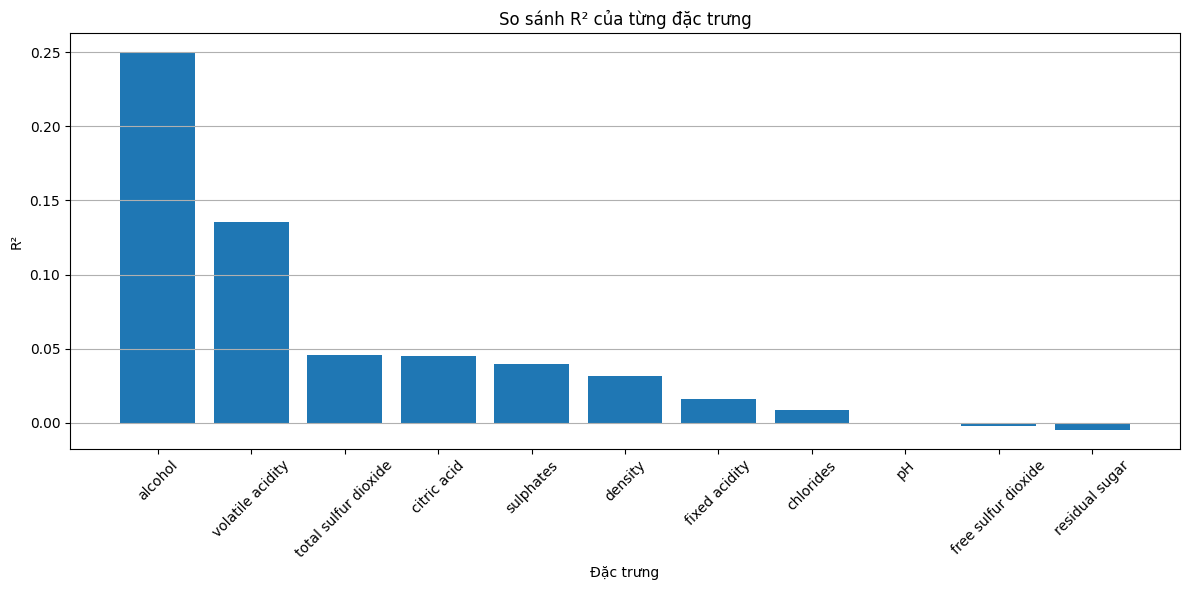

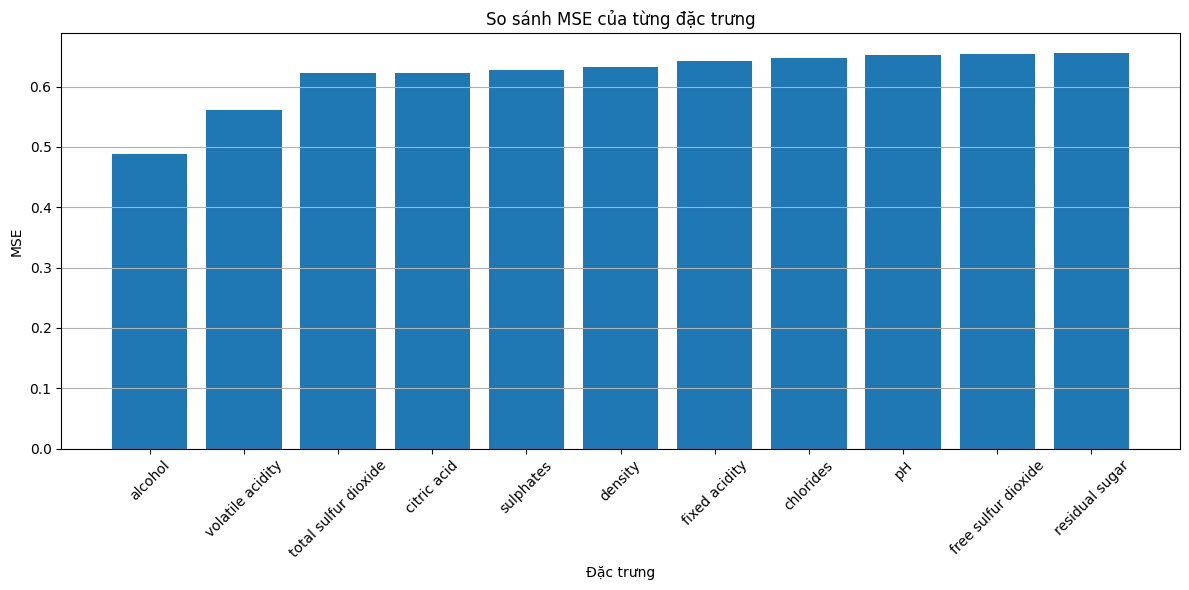


Mô hình cho đặc trưng tốt nhất (alcohol):
  Hệ số chặn (β₀): 1.774076
  Hệ số góc (β₁): 0.374710
  MSE: 0.487635
  R²: 0.255398
  Phương trình hồi quy: quality = 1.774076 + 0.374710 × alcohol


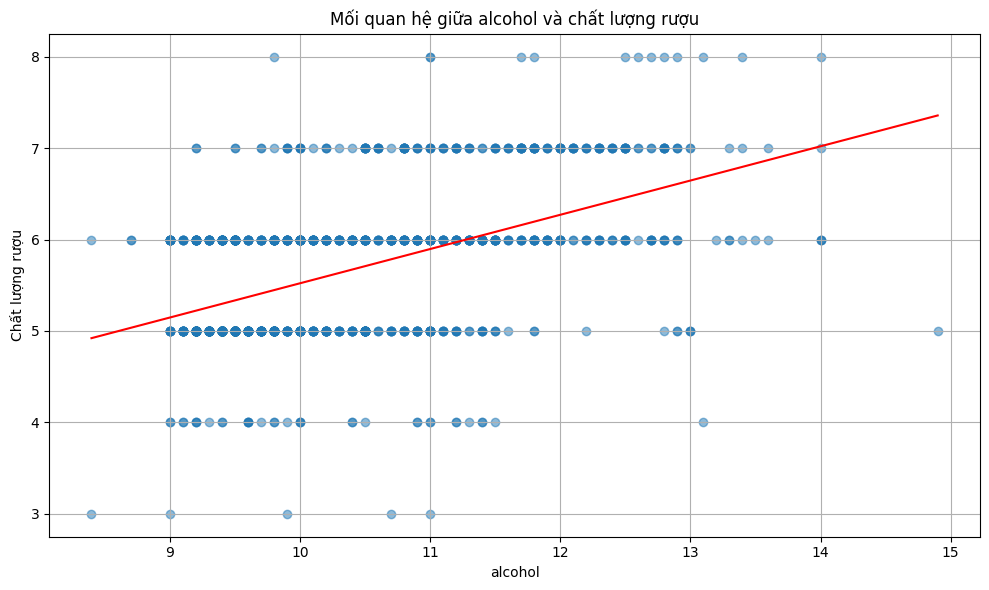

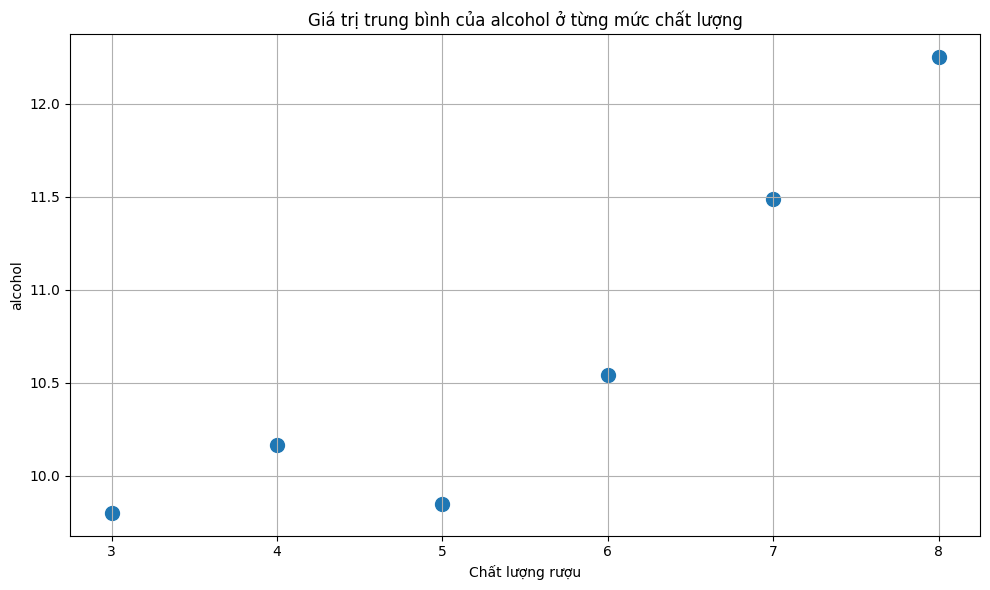

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Tên các cột trong DataFrame
feature_columns = df.columns[1:].tolist()  # Bỏ qua cột đầu tiên (chất lượng)
quality_col = df.columns[0]  # Cột đầu tiên là chất lượng

# Danh sách để lưu MSE và R² cho từng đặc trưng
all_mse = []  
all_r2 = []
feature_names = []

# Các hàm tính toán vector cơ bản thay thế cho numpy
def mean(values):
    """Tính giá trị trung bình của một danh sách số"""
    return sum(values) / len(values) if values else 0

def sum_of_squares(values):
    """Tính tổng bình phương của một danh sách số"""
    return sum(x * x for x in values)

def sum_of_products(values1, values2):
    """Tính tổng các tích của hai danh sách số tương ứng"""
    return sum(x * y for x, y in zip(values1, values2))

def subtract_constant(values, constant):
    """Trừ một hằng số từ mỗi phần tử trong danh sách"""
    return [x - constant for x in values]

def multiply_vectors(values1, values2):
    """Nhân hai vector với nhau theo từng phần tử"""
    return [x * y for x, y in zip(values1, values2)]

def square_vector(values):
    """Bình phương từng phần tử trong vector"""
    return [x * x for x in values]

# Hàm tự triển khai k-fold cross validation
def custom_kfold(n_samples, n_folds=5, random_seed=42):
    """
    Tự triển khai k-fold cross validation.
    
    Parameters:
    n_samples (int): Số lượng mẫu
    n_folds (int): Số lượng fold
    random_seed (int): Giá trị seed để tái tạo kết quả
    
    Returns:
    list: Danh sách các cặp chỉ số (train_indices, test_indices)
    """
    # Đặt seed cho khả năng tái tạo
    random.seed(random_seed)
    
    # Tạo chỉ số cho tất cả các mẫu
    indices = list(range(n_samples))
    
    # Xáo trộn chỉ số
    random.shuffle(indices)
    
    # Chia thành k phần gần bằng nhau
    fold_sizes = [n_samples // n_folds] * n_folds
    # Phân phối phần dư
    for i in range(n_samples % n_folds):
        fold_sizes[i] += 1
    
    # Tạo chỉ số cho từng fold
    current = 0
    folds = []
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        test_indices = indices[start:stop]
        train_indices = indices[:start] + indices[stop:]
        folds.append((train_indices, test_indices))
        current = stop
        
    return folds

# Hàm triển khai OLS từ đầu (đơn giản hóa cho một đặc trưng)
def ols_single_feature(X, y):
    """
    Triển khai thuật toán OLS cho một đặc trưng.
    
    Công thức đơn giản hóa:
    β₁ = Σ(x_i - x̄)(y_i - ȳ) / Σ(x_i - x̄)²
    β₀ = ȳ - β₁x̄
    
    Parameters:
    X (list): Vector đặc trưng (1D)
    y (list): Vector giá trị mục tiêu
    
    Returns:
    tuple: (β₀, β₁) - hệ số chặn và hệ số góc
    """
    # Tính giá trị trung bình
    x_mean = mean(X)
    y_mean = mean(y)
    
    # Tính hiệu
    x_minus_mean = subtract_constant(X, x_mean)
    y_minus_mean = subtract_constant(y, y_mean)
    
    # Tính hệ số góc β₁
    numerator = sum_of_products(x_minus_mean, y_minus_mean)
    denominator = sum_of_squares(x_minus_mean)
    
    # Kiểm tra chia cho 0
    if denominator == 0:
        beta_1 = 0
    else:
        beta_1 = numerator / denominator
    
    # Tính hệ số chặn β₀
    beta_0 = y_mean - beta_1 * x_mean
    
    return beta_0, beta_1

# Hàm dự đoán
def predict(X, beta_0, beta_1):
    """
    Dự đoán dựa trên mô hình hồi quy tuyến tính đơn giản.
    
    Parameters:
    X (list): Vector đặc trưng (1D)
    beta_0 (float): Hệ số chặn
    beta_1 (float): Hệ số góc
    
    Returns:
    list: Vector giá trị dự đoán
    """
    return [beta_0 + beta_1 * x for x in X]

# Hàm tính MSE và R²
def evaluate_model(y_true, y_pred):
    """
    Tính các chỉ số đánh giá mô hình.
    
    Parameters:
    y_true (list): Giá trị thực tế
    y_pred (list): Giá trị dự đoán
    
    Returns:
    tuple: (MSE, R²)
    """
    # Tính sai số
    errors = [y_t - y_p for y_t, y_p in zip(y_true, y_pred)]
    squared_errors = [e * e for e in errors]
    
    # Tính Mean Squared Error (MSE)
    mse = mean(squared_errors)
    
    # Tính Total Sum of Squares (TSS)
    y_mean = mean(y_true)
    tss_errors = [y_t - y_mean for y_t in y_true]
    tss = sum(e * e for e in tss_errors)
    
    # Tính Residual Sum of Squares (RSS)
    rss = sum(squared_errors)
    
    # Tính hệ số xác định R²
    if tss == 0:
        r_squared = 0
    else:
        r_squared = 1 - (rss / tss)
    
    return mse, r_squared

# Hàm lấy phần tử theo chỉ số
def get_subset_by_indices(data, indices):
    """Lấy các phần tử từ danh sách theo danh sách chỉ số"""
    return [data[i] for i in indices]

# Số fold cho cross validation
k = 10
n_samples = len(df)

# Tạo folds cho cross validation
folds = custom_kfold(n_samples, n_folds=k, random_seed=42)

# Đánh giá từng đặc trưng sử dụng cross validation
print("Bắt đầu phân tích từng đặc trưng...\n")

for feature_col in feature_columns:
    X = df[feature_col].tolist()  # Chuyển thành list thay vì numpy array
    y = df[quality_col].tolist()
    
    # Loại bỏ dấu ngoặc kép cho tên đặc trưng
    feature_name = feature_col.strip('"')
    feature_names.append(feature_name)
    
    # Khởi tạo danh sách để lưu kết quả của các fold
    fold_mse = []
    fold_r2 = []
    
    # Thực hiện k-fold cross validation
    for i, (train_idx, test_idx) in enumerate(folds):
        X_train = get_subset_by_indices(X, train_idx)
        X_test = get_subset_by_indices(X, test_idx)
        y_train = get_subset_by_indices(y, train_idx)
        y_test = get_subset_by_indices(y, test_idx)
        
        # Tính hệ số hồi quy
        beta_0, beta_1 = ols_single_feature(X_train, y_train)
        
        # Dự đoán
        y_pred = predict(X_test, beta_0, beta_1)
        
        # Đánh giá
        mse, r2 = evaluate_model(y_test, y_pred)
        
        fold_mse.append(mse)
        fold_r2.append(r2)
    
    # Tính trung bình các chỉ số đánh giá qua các fold
    avg_mse = mean(fold_mse)
    avg_r2 = mean(fold_r2)
    
    all_mse.append(avg_mse)
    all_r2.append(avg_r2)
    
    print(f"Đặc trưng: {feature_name}")
    print(f"  MSE trung bình: {avg_mse:.6f}")
    print(f"  R² trung bình: {avg_r2:.6f}")

# Tạo bảng kết quả
results = pd.DataFrame({
    'Feature': feature_names,
    'MSE': all_mse,
    'R²': all_r2
})

# Hàm trợ giúp để sắp xếp DataFrame
def sort_dataframe(df, column, ascending=True):
    """Sắp xếp DataFrame theo một cột cụ thể"""
    sorted_indices = sorted(range(len(df)), key=lambda i: df.iloc[i][column], reverse=not ascending)
    return df.iloc[sorted_indices].reset_index(drop=True)

# Sắp xếp theo R² giảm dần và MSE tăng dần
results_by_r2 = sort_dataframe(results, 'R²', ascending=False)
results_by_mse = sort_dataframe(results, 'MSE', ascending=True)

print("\nXếp hạng theo R²:")
print(results_by_r2)

print("\nXếp hạng theo MSE:")
print(results_by_mse)

# Tìm đặc trưng tốt nhất
best_feature_r2_idx = all_r2.index(max(all_r2))
best_feature_r2 = feature_names[best_feature_r2_idx]

best_feature_mse_idx = all_mse.index(min(all_mse))
best_feature_mse = feature_names[best_feature_mse_idx]

print(f"\nĐặc trưng tốt nhất theo R²: {best_feature_r2}")
print(f"Đặc trưng tốt nhất theo MSE: {best_feature_mse}")

# Vẽ biểu đồ so sánh R² của các đặc trưng
plt.figure(figsize=(12, 6))
plt.bar(results_by_r2['Feature'], results_by_r2['R²'])
plt.xlabel('Đặc trưng')
plt.ylabel('R²')
plt.title('So sánh R² của từng đặc trưng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Vẽ biểu đồ so sánh MSE của các đặc trưng
plt.figure(figsize=(12, 6))
plt.bar(results_by_mse['Feature'], results_by_mse['MSE'])
plt.xlabel('Đặc trưng')
plt.ylabel('MSE')
plt.title('So sánh MSE của từng đặc trưng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Phân tích chi tiết đặc trưng tốt nhất
best_feature_col = f'"{best_feature_r2}"'  # Thêm dấu ngoặc kép
X_best = df[best_feature_col].tolist()
y = df[quality_col].tolist()

# Tính hệ số cho toàn bộ dữ liệu
beta_0, beta_1 = ols_single_feature(X_best, y)
y_pred = predict(X_best, beta_0, beta_1)
mse, r2 = evaluate_model(y, y_pred)

print(f"\nMô hình cho đặc trưng tốt nhất ({best_feature_r2}):")
print(f"  Hệ số chặn (β₀): {beta_0:.6f}")
print(f"  Hệ số góc (β₁): {beta_1:.6f}")
print(f"  MSE: {mse:.6f}")
print(f"  R²: {r2:.6f}")
print(f"  Phương trình hồi quy: quality = {beta_0:.6f} + {beta_1:.6f} × {best_feature_r2}")

# Vẽ biểu đồ mô hình hồi quy cho đặc trưng tốt nhất
plt.figure(figsize=(10, 6))
plt.scatter(X_best, y, alpha=0.5)
min_x = min(X_best)
max_x = max(X_best)
plt.plot([min_x, max_x], [beta_0 + beta_1*min_x, beta_0 + beta_1*max_x], 'r-')
plt.xlabel(best_feature_r2)
plt.ylabel('Chất lượng rượu')
plt.title(f'Mối quan hệ giữa {best_feature_r2} và chất lượng rượu')
plt.grid(True)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ tương quan giữa đặc trưng tốt nhất và chất lượng rượu
plt.figure(figsize=(10, 6))

# Tìm các mức chất lượng duy nhất
quality_levels = sorted(set(y))
means = []

# Tính giá trị trung bình của đặc trưng tốt nhất cho từng mức chất lượng
for quality in quality_levels:
    # Tìm các chỉ số của mẫu có chất lượng này
    indices = [i for i, q in enumerate(y) if q == quality]
    # Lấy các giá trị đặc trưng tương ứng
    feature_values = [X_best[i] for i in indices]
    # Tính trung bình
    means.append(mean(feature_values))

plt.scatter(quality_levels, means, s=100)
plt.ylabel(best_feature_r2)
plt.xlabel('Chất lượng rượu')
plt.title(f'Giá trị trung bình của {best_feature_r2} ở từng mức chất lượng')
plt.grid(True)
plt.tight_layout()
plt.show()

Với số lượng 1198 dòng dữ liệu, một giá trị k = 10 sẽ là lựa chọn phù hợp nhất bởi vì:

Cân bằng giữa độ chính xác và hiệu quả tính toán:

Mỗi fold sẽ có khoảng 120 mẫu, đủ lớn để đánh giá hiệu suất mô hình
Không quá tốn kém về mặt tính toán như k cao hơn


Độ tin cậy của đánh giá:

k = 10 cung cấp ước lượng phương sai thấp hơn so với k = 5
Tạo ra kết quả ổn định và đáng tin cậy hơn


Thực tiễn trong ngành:

k = 10 là tiêu chuẩn ngành được chấp nhận rộng rãi cho các bộ dữ liệu có kích thước trung bình như trường hợp này


Đủ lớn để giảm thiểu bias:

Với k = 10, mỗi mô hình được huấn luyện trên 90% dữ liệu, giúp giảm thiểu bias
Vẫn cho phép kiểm tra trên đủ dữ liệu (10%)

***
## **5. Kiểm tra kết quả**

Ví dụ 1:

Ví dụ 2:

***
## **6. Mở rộng: Sử dụng thư viện và so sánh kết quả**

Ta có thể sử dụng các hàm trong thư viện NumPy:
-  Sử dụng np.linalg.eig() để tính trị riêng và vector riêng
- np.linalg.inv() để tính nghịch đảo ma trận

Ngoài ra, ta cũng có thể sử dụng thư viện `sympy` với hàm eigenvects() để tính trị riêng và vector riêng và hàm inv() để tìm nghịch đảo của ma trận

**Nhận xét**:
- Kết quả dùng thư viện `sympy` gần tương đồng với kết quả gốc do cài đặt thủ công hơn so với kết quả dùng thư viện `numpy`.
- `sympy` thực hiện các tính toán chính xác hơn nên không bị vấn đề về sai số số học như `numpy`.
- `sympy` có xu hướng chạy chậm hơn so với `numpy`, vì `sympy` tập trung vào tính toán biểu tượng (symbolic) chính xác thay vì tính toán số (numerical) hiệu quả.


***

## **7. Mở rộng: Ứng dụng của chéo hóa**


> Phép chéo hóa ma trận (diagonalization) là một quá trình quan trọng trong đại số tuyến tính với nhiều ứng dụng thực tiễn. Ứng dụng của ma trận chéo hóa rất đa dạng, từ việc giải quyết các bài toán trong cơ học lượng tử, xử lý tín hiệu, đến việc phân tích hệ thống động lực học. Các ma trận chéo hóa giúp tối ưu hóa các phép tính và cải thiện hiệu quả của các thuật toán. Dưới đây là một số ứng dụng tiêu biểu:

#### **a. Tính lũy thừa của ma trận**
Để tìm A^n, ta chéo hóa ma trận A trên, vì nếu A chéo hóa được thì:

> (P^−1)AP = D ⇔ A = PD(P^−1)  
⇔ A^k = (PD(P^−1))^k = PD^k(P^−1)

*D^k rất dễ tính vì chỉ cần lấy lũy thừa của các phần tử trên đường chéo.*

Tiếp cận này có thể được tổng quát hóa lên với hàm mũ ma trận và các hàm ma trận khác mà có thể được định nghĩa theo chuỗi lũy thừa.

#### **b. Tìm một dãy số thỏa công thức truy hồi**

Ví dụ như dãy Fibonacci: Mỗi số hạng trong dãy Fibonnacci, kể từ số hạng thứ ba, bằng tổng của hai số hạng đứng ngay trước nó. Ta có thể dùng chéo hóa để tìm công thức tổng quát để xác định số hạng F_n.

#### **c. Phân tích thành phần chính (PCA)**

Trong phân tích dữ liệu, PCA sử dụng chéo hóa ma trận hiệp phương sai để xác định các thành phần chính - những hướng có phương sai lớn nhất trong dữ liệu. Các vector riêng tương ứng với trị riêng lớn nhất chỉ ra các hướng quan trọng nhất trong không gian dữ liệu, từ đó giảm chiều dữ liệu và loại bỏ nhiễu. Điều này cải thiện hiệu quả và độ chính xác của các thuật toán học máy trong khoa học dữ liệu và học máy. Điều này còn được ứng dụng trong nhận diện khuôn mặt.

#### **d. Giải hệ phương trình vi phân**

Chéo hóa ma trận được sử dụng để giải các hệ phương trình vi phân, đặc biệt là trong các mô hình toán học phức tạp như động lực học chất lỏng, hệ thống cơ học, và mô phỏng khí hậu.

#### **e. Xử lý tín hiệu và hình ảnh**

Trong lĩnh vực xử lý tín hiệu và hình ảnh, việc chéo hóa ma trận giúp phân tích các tín hiệu và hình ảnh dễ dàng hơn. Ví dụ, trong nén ảnh, ma trận chéo hóa giúp giảm lượng thông tin cần lưu trữ mà vẫn giữ được chất lượng ảnh.

#### **f. Tối ưu hóa bộ nhớ và tính toán**

Ma trận chéo hóa giúp giảm số lượng phép tính cần thiết khi thực hiện các phép toán ma trận, từ đó tối ưu hóa bộ nhớ và tăng tốc độ tính toán. Điều này đặc biệt hữu ích trong các ứng dụng yêu cầu xử lý dữ liệu lớn.

#### **g. Định tuyến mạng**
Trong lĩnh vực mạng máy tính, ma trận chéo hóa được sử dụng để tối ưu hóa các thuật toán định tuyến, giúp cải thiện hiệu quả truyền tải dữ liệu qua mạng.

#### **h. Chéo hóa trong cơ học lượng tử**
Trong các tính toán của cơ học lượng tử và hóa lượng tử, chéo hóa ma trận là một trong những quy trình số thường được áp dụng nhất. Lý do cơ bản là do phương trình không phụ thuộc thời gian Schrödinger là một phương trình giá trị riêng, mặc dù nó là trên một không gian vô hạn chiều (một không gian Hilbert) trong hầu hết các tình huống vật lý.


***
## **8. Mô tả ý tưởng và các hàm**
### **Ý tưởng**

Cho A là ma trận (vuông) có thể chéo hóa được. Chương trình sẽ triển khai thuật toán chéo hóa ma trận để tìm ra ma trận làm chéo P, P^(-1) và ma trận đường chéo D:
- P là ma trận có các cột là các vector riêng của A
- P^(-1) là ma trận nghịch đảo của P (*sử dụng thuật toán Gauss - Jordan*)
- D là ma trận đường chéo chứa các trị riêng tương ứng

Thuật toán chéo hóa đã được trình bày ở Phần 2.

Để tìm trị riêng từ đa thức đặc trưng, tức là tìm nghiệm của phương trình đa thức đặc trưng bằng 0, ta kết hợp nhiều phương pháp để tìm ra nghiệm tổng quát với bậc n bất kỳ (n = 1, 2, 3, 4, ...):
  - Áp dụng các công thức trực tiếp cho đa thức bậc 1, 2 (delta)
  - Với các phương trình bậc cao hơn, ta áp dụng phương pháp chia đôi (bisection) để xác định vùng chứa nghiệm, áp dụng phương pháp Newton để tinh chỉnh nghiệm

### **Mô tả các hàm**

#### **a. Các hàm tiện ích cơ bản**
- `create_matrix(rows, cols, default_value=0)`: Tạo ma trận với kích thước `rows`, `cols`
- `create_identity_matrix(n)`: Tạo ma trận đơn vị kích thước n × n
- `matrix_copy(A)`: Tạo bản sao ma trận A
- `matrix_multiply(A, B)`: Nhân hai ma trận
- `matrix_subtract(A, B)`: Trừ hai ma trận
- `num_multiply(num, A)`: Nhân ma trận với một số
- `matrix_subtract_lambda_I(A, lambda_val)`: Tạo ma trận A - λI
- `polynomial_multiply(p1, p2)`: Nhân hai đa thức
- `determinant(A)`: Tính định thức ma trận bằng khai triển theo cột
- `round_matrix(A, decimals)`: Làm tròn các phần tử ma trận
- `print_matrix(A)`: In ra ma trận

#### **b. Tính đa thức đặc trưng**
- `get_minor_matrix(matrix, rows_to_remove, cols_to_remove)`: Tạo ma trận con
- `characteristic_polynomial(A)`: Tính đa thức đặc trưng P(λ) = det(A - λI)
  - Xử lý riêng cho ma trận kích thước 1×1, 2×2, 3×3
  - Tính tổng quát cho ma trận n × n bằng phương pháp khai triển
  - Trả về hệ số đa thức theo bậc giảm dần

#### **c. Tìm trị riêng**
- `find_eigenvalues(poly)`: Tìm trị riêng và bội số từ đa thức đặc trưng
- `find_polynomial_roots_with_multiplicity(poly)`: Tìm nghiệm và bội số của đa thức
- `polynomial_deflation(poly, root)`: Chia đa thức cho (x - root) bằng thuật toán Horner để tiếp tục tìm các nghiệm mới
- `evaluate_polynomial(poly, x)`: Tính giá trị đa thức tại x
- `find_real_roots_with_bisection(poly)`: Tìm nghiệm thực bằng phương pháp chia đôi
- `bisection_method(poly, a, b)`: Tìm nghiệm trong khoảng [a,b] bằng phương pháp chia đôi
- `newton_method(poly, x0)`: Tìm nghiệm bằng phương pháp Newton
- `derivative_polynomial(poly)`: Tính đạo hàm của đa thức

#### **d. Tìm vector riêng**
- `gauss_elimination(A)`: Đưa ma trận về dạng bậc thang rút gọn
- `find_eigenvectors(A, eigenval, multiplicity)`: Tìm vector riêng tương ứng với trị riêng
  - Giải hệ phương trình (A - λI)x = 0
  - Xác định biến tự do và pivot
  - Tính toán giá trị của các biến phụ thuộc

#### **e. Tính ma trận nghịch đảo**
- `compute_inverse(P)`: Tính ma trận nghịch đảo bằng phương pháp Gauss - Jordan với ma trận mở rộng [P|I].

#### **f. Chéo hóa ma trận**
- `is_diagonalizable(A)`: Kiểm tra và thực hiện chéo hóa ma trận A
  - Trả về ma trận P, P⁻¹ và D nếu ma trận chéo hóa được
  - Trả về cảnh báo, thông báo nếu không chéo hóa được

#### **g. So sánh với thư viện**
- Sử dụng `numpy.linalg.eig()` để tính trị riêng và vector riêng
- Sử dụng `sympy.Matrix.eigenvects()` để tính trị riêng và vector riêng với độ chính xác cao hơn, gần với đáp án do cài đặt thủ công hơn